In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('..')

import dataset
import numbs
import gp_backprop

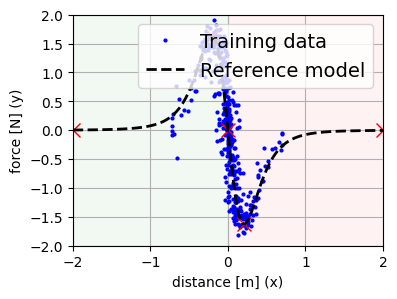

In [2]:
S = dataset.MagmanDatasetScaled()
#S.sample(size=250, noise=0.03, mesh=False)
S.load('../data/magman.csv')
S.plot(width=4, height=3)

S.index()
numbs.init(S)

In [7]:
population = gp_backprop.random_population(popsize=1, max_depth=2)
best_stree = gp_backprop.evaluate(population, S)

((A(x) + B(x)) / (C(x) * D(x)))
--- ASP Model ---
sign_unkn("B","+",0,1) sign_unkn("B","+",1,2) sign_unkn("B","+",2,3) sign_unkn("B","+",3,4) sign_unkn("D","+",-4,-3) sign_unkn("D","+",-3,-2) sign_unkn("D","+",-2,-1) sign_unkn("D","+",-1,0) sign_unkn("D","+",0,1) sign_unkn("D","+",1,2) sign_unkn("D","+",2,3) sign_unkn("D","+",3,4) sign_unkn("B","-",-4,-3) sign_unkn("B","-",-3,-2) sign_unkn("B","-",-2,-1) sign_unkn("B","-",-1,0) sign_unkn("A","+",-4,-3) sign_unkn("A","+",-3,-2) sign_unkn("A","+",-2,-1) sign_unkn("A","+",-1,0) sign_unkn("C","-",-4,-3) sign_unkn("C","-",-3,-2) sign_unkn("C","-",-2,-1) sign_unkn("C","-",-1,0) sign_unkn("C","-",0,1) sign_unkn("C","-",1,2) sign_unkn("C","-",2,3) sign_unkn("C","-",3,4) sign_unkn("A","-",0,1) sign_unkn("A","-",1,2) sign_unkn("A","-",2,3) sign_unkn("A","-",3,4) sign_unkn("B'","+",1,2) sign_unkn("B'","+",2,3) sign_unkn("B'","+",3,4) sign_unkn("B'","+",-4,-3) sign_unkn("B'","+",-3,-2) sign_unkn("B'","+",-2,-1) sign_unkn("B'","+",0,1) sign_unkn("B

--- Best Syntax Tree ---
((A(x) + B(x)) / (C(x) * D(x)))


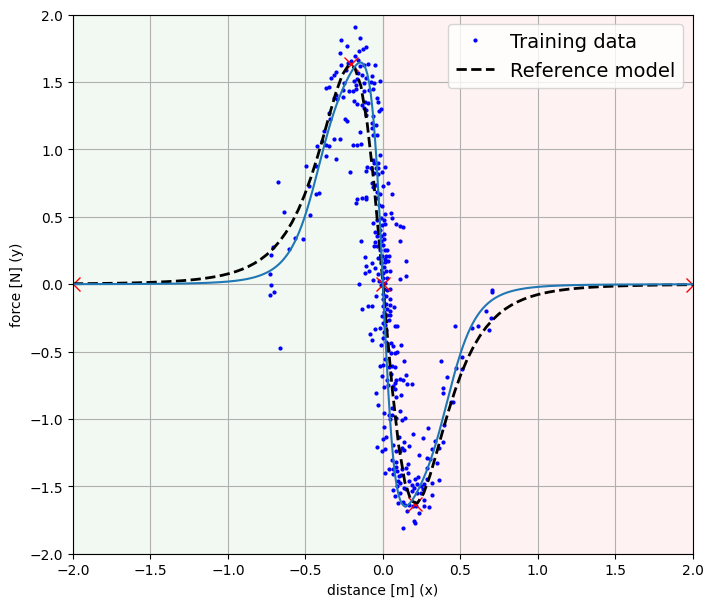

In [8]:
print("--- Best Syntax Tree ---")
print(best_stree)

if best_stree is not None:
    S.plot(width=8, height=7)
    xp = np.linspace(S.xl, S.xu, 500)
    plt.plot(xp, best_stree.compute_output(xp));
    plt.show()

In [14]:
import backprop
unkn_collector = backprop.UnknownSyntaxTreeCollector()
best_stree.accept(unkn_collector)
for unkn_label in unkn_collector.unknown_labels:
    print(f"{unkn_label}(x) = {best_stree.get_unknown_stree(unkn_label).model}")

C(x) =             6             4             2
-4.146e-07 x + 1.023e-07 x - 1.574e-08 x + 0.4301
B(x) =  
0.5314 x
A(x) =             5           3
-6.078e-05 x + 0.02026 x - 3.039 x
D(x) =        6         4         2
333.2 x - 52.91 x + 14.01 x + 0.2393
